In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transactions-fraud-datasets/mcc_codes.json
/kaggle/input/transactions-fraud-datasets/users_data.csv
/kaggle/input/transactions-fraud-datasets/transactions_data.csv
/kaggle/input/transactions-fraud-datasets/cards_data.csv
/kaggle/input/transactions-fraud-datasets/train_fraud_labels.json


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot  
init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv('/kaggle/input/transactions-fraud-datasets/cards_data.csv',parse_dates=['expires','acct_open_date'])
df

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,2022-12-01,623,YES,2,$24295,2002-09-01,2008,No
1,2731,825,Visa,Debit,4956965974959986,2020-12-01,393,YES,2,$21968,2014-04-01,2014,No
2,3701,825,Visa,Debit,4582313478255491,2024-02-01,719,YES,2,$46414,2003-07-01,2004,No
3,42,825,Visa,Credit,4879494103069057,2024-08-01,693,NO,1,$12400,2003-01-01,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,2009-03-01,75,YES,1,$28,2008-09-01,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,5361,185,Amex,Credit,300609782832003,2024-01-01,663,YES,1,$6900,2000-11-01,2013,No
6142,2711,185,Visa,Credit,4718517475996018,2021-01-01,492,YES,2,$5700,2012-04-01,2012,No
6143,1305,1007,Mastercard,Credit,5929512204765914,2020-08-01,237,NO,2,$9200,2012-02-01,2012,No
6144,743,1110,Mastercard,Debit,5589768928167462,2020-01-01,630,YES,1,$28074,2020-01-01,2020,No


In [4]:
df.columns

Index(['id', 'client_id', 'card_brand', 'card_type', 'card_number', 'expires',
       'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web'],
      dtype='object')

In [5]:
df.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [6]:
df.tail()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
6141,5361,185,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No
6142,2711,185,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No
6143,1305,1007,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No
6144,743,1110,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No
6145,3199,1110,Visa,Credit,4994011318343994,12/2020,120,YES,1,$14400,05/2017,2017,No


In [8]:
df.shape

(6146, 13)

In [5]:
df['credit_limit']= df['credit_limit'].astype(str).str.replace('$','')
df['credit_limit']= pd.to_numeric(df['credit_limit'].str.replace('[^0-9]','',regex=True),errors='coerce').fillna(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [48]:
df.describe()

,id,client_id,card_number,expires,cvv,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,date
count,6146.000000,6146.000000,6.146000e+03,6146,6146.000000,6146.000000,6146.000000,6146,6146.000000,6146.000000
mean,3072.500000,994.939636,4.820426e+15,2020-10-08 06:30:06.443215360,506.220794,1.503091,14347.493980,2011-01-15 12:55:31.727953152,2013.436707,3553.732346
min,0.000000,0.000000,3.001055e+14,1997-07-01 00:00:00,0.000000,1.000000,0.000000,1991-01-01 00:00:00,2002.000000,0.000000
25%,1536.250000,492.250000,4.486365e+15,2020-02-01 00:00:00,257.000000,1.000000,7042.750000,2006-10-01 00:00:00,2010.000000,1310.000000
50%,3072.500000,992.000000,5.108957e+15,2021-09-01 00:00:00,516.500000,1.000000,12592.500000,2010-02-15 00:00:00,2013.000000,3714.000000
75%,4608.750000,1495.000000,5.585237e+15,2023-05-01 00:00:00,756.000000,2.000000,19156.500000,2016-05-01 00:00:00,2017.000000,5387.000000
max,6145.000000,1999.000000,6.997197e+15,2024-12-01 00:00:00,999.000000,3.000000,151223.000000,2020-02-01 00:00:00,2020.000000,12144.000000
std,1774.341709,578.614626,1.328582e+15,NaN,289.431123,0.519191,12014.463884,NaN,4.270699,2422.374107


In [23]:
df.describe(include='O')

,card_brand,card_type,has_chip,credit_limit,card_on_dark_web
count,6146,6146,6146,6146,6146
unique,4,3,2,3654,1
top,Mastercard,Debit,YES,$0,No
freq,3209,3511,5500,31,6146


In [11]:
df.isnull().sum()

id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [24]:
df['card_type'].unique()

array(['Debit', 'Credit', 'Debit (Prepaid)'], dtype=object)

In [27]:
df['num_cards_issued'].unique()

array([2, 1, 3])

In [29]:
df['card_brand'].unique()

array(['Visa', 'Mastercard', 'Discover', 'Amex'], dtype=object)

In [30]:
num_cards_type = df.groupby(['card_brand','card_type'])['num_cards_issued'].count().reset_index(name='count')
num_cards_type

,card_brand,card_type,count
0,Amex,Credit,402
1,Discover,Credit,209
2,Mastercard,Credit,635
3,Mastercard,Debit,2191
4,Mastercard,Debit (Prepaid),383
5,Visa,Credit,811
6,Visa,Debit,1320
7,Visa,Debit (Prepaid),195


<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Card Brand Analysis</title>
  <style>
    body {
      font-family: Arial, sans-serif;
      background: #f8f9fa;
      display: flex;
      justify-content: center;
      align-items: center;
      padding: 40px;
    }
    .analysis-card {
      background: white;
      border-radius: 16px;
      box-shadow: 0px 4px 20px rgba(0, 0, 0, 0.1);
      padding: 25px;
      max-width: 800px;
      width: 100%;
    }
    h2 {
      text-align: center;
      color: #1f2937;
      font-weight: bold;
      margin-bottom: 15px;
    }
    .description {
      font-size: 1rem;
      color: #374151;
      margin-bottom: 20px;
      line-height: 1.6;
    }
    .key-points {
      list-style: none;
      padding: 0;
    }
    .key-points li {
      background: #e5e7eb;
      margin: 8px 0;
      padding: 10px;
      border-radius: 8px;
      font-size: 0.95rem;
    }
    .chart-placeholder {
      background: linear-gradient(135deg, #a7f3d0, #6ee7b7);
      height: 300px;
      border-radius: 12px;
      display: flex;
      justify-content: center;
      align-items: center;
      color: #065f46;
      font-weight: bold;
      font-size: 1.2rem;
      margin-top: 20px;
    }
  </style>
</head>
<body>
  <div class="analysis-card">
    <h2>Card Brand by Number of Cards Issued</h2>
    <p class="description">
      This analysis groups the data by <strong>card brand</strong> and <strong>card type</strong>,
      then counts the number of cards issued for each combination.
      The bar chart below shows the distribution visually to help compare which brands
      and types have the highest card issuance.
    </p>

  </div>
</body>
</html>


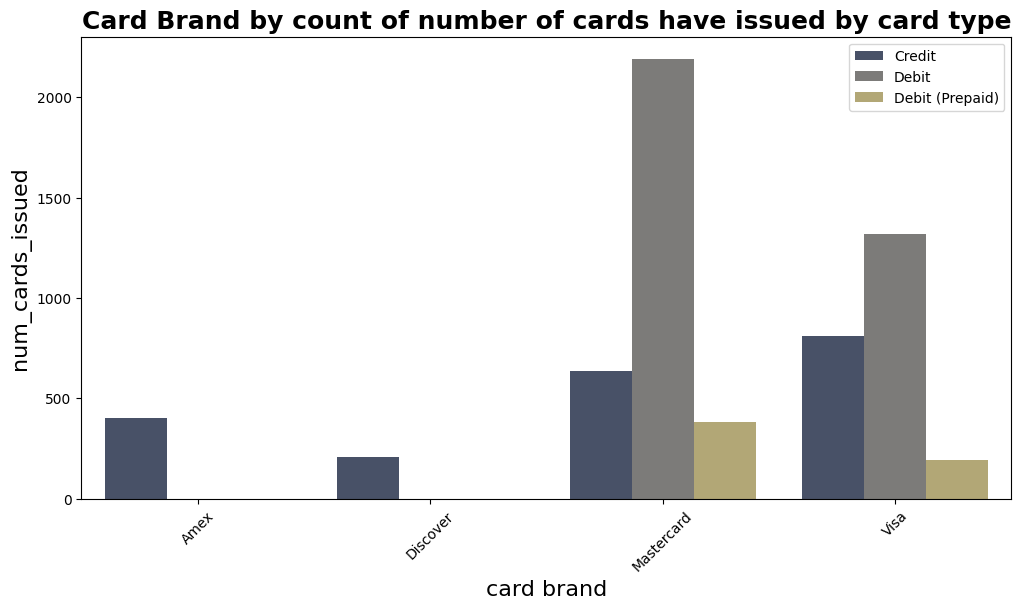

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(x=num_cards_type['card_brand'],y=num_cards_type['count'],hue=num_cards_type['card_type'],palette='cividis')
plt.title('Card Brand by count of number of cards have issued by card type', fontweight='bold',fontsize=18)
plt.xlabel('card brand',fontsize=16)
plt.ylabel('num_cards_issued',fontsize=16)
plt.xticks(rotation =45)
plt.legend()
plt.show()

In [5]:
df['card_on_dark_web'].unique()

array(['No'], dtype=object)

In [24]:
brand_cards_limit = df.groupby(['card_brand','card_type'])['credit_limit'].mean().reset_index(name='AVG')
brand_cards_limit

,card_brand,card_type,AVG
0,Amex,Credit,11436.318408
1,Discover,Credit,10816.267943
2,Mastercard,Credit,10971.653543
3,Mastercard,Debit,18279.711091
4,Mastercard,Debit (Prepaid),64.778068
5,Visa,Credit,11295.561036
6,Visa,Debit,19019.621212
7,Visa,Debit (Prepaid),63.800000


<html lang="en">
<head>
  <meta charset="utf-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1" />
  <title>Average Credit Limit — Card Brand & Type</title>
  <style>
    :root{
      --bg: #f7fafc;
      --card:#FBF3D5;
      --muted:#6b7280;
      --accent:#0ea5a0;
      --shadow: 0 6px 22px rgba(15, 23, 42, 0.08);
      --radius:14px;
      font-family: Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
    }
    *{box-sizing:border-box}
    body{
      margin:0; background:var(--bg); color:#0f172a; padding:32px; display:flex; justify-content:center;
    }
    .card{
      width:100%; max-width:980px; background:var(--card); border-radius:var(--radius); box-shadow:var(--shadow); padding:28px;
    }
    .head{display:flex; align-items:center; justify-content:space-between; gap:16px}
    h1{font-size:20px; margin:0}
    p.lead{margin:6px 0 0; color:var(--muted); font-size:14px}

.grid{display:grid; grid-template-columns: 1fr 320px; gap:20px; margin-top:20px}

/* left: description + chart placeholder */
    .description{background:linear-gradient(180deg,#fff, #fbfdff); padding:18px; border-radius:12px}
    .kpi-list{display:flex; gap:12px; margin-top:12px}
    .kpi{flex:1; background:#f8fafb; padding:12px; border-radius:10px; text-align:center}
    .kpi .value{font-weight:700; font-size:18px}
    .kpi .label{font-size:12px; color:var(--muted)}

.chart-placeholder{height:300px; border-radius:10px; display:flex; align-items:center; justify-content:center; background:repeating-linear-gradient(135deg, #e6fffa 0 10px, #f0fdfa 10px 20px); color:#064e3b; font-weight:700}

/* right: details */
    .details{padding:18px; border-radius:12px; background:#ffffff; border:1px solid #eef2f7}
    .details h3{margin:0 0 10px 0}
    .list{margin:0; padding:0; list-style:none}
    .list li{padding:8px 0; border-bottom:1px dashed #eef2f7; font-size:14px}
    .small{font-size:13px; color:var(--muted)}

table{width:100%; border-collapse:collapse; margin-top:12px}
th,td{padding:8px 10px; text-align:left; font-size:13px}
th{font-size:12px; color:var(--muted); font-weight:600}

/* responsive */
@media (max-width:900px){
.grid{grid-template-columns:1fr}
.chart-placeholder{height:240px}
    }
  </style>
</head>
<body>
  <div class="card">
    <div class="head">
      <div>
        <h1>Average Credit Limit by Card Brand &amp; Card Type</h1>
        <p class="lead">Grouping the dataset by <code>card_brand</code> and <code>card_type</code>, then computing the average <code>credit_limit</code> for each combination. Useful to spot which brands and types hold higher credit exposure.</p>
      </div>
    </div>

<div class="grid">
      <div>
        <div class="description">
          <strong>What this relation shows</strong>
          <p class="small" style="margin-top:8px">Each bar in the chart represents the average credit limit for a specific card brand. Bars are colored by <em>card type</em> (e.g., Credit, Debit). Comparing bars helps identify brands that extend larger limits and whether credit cards dominate those averages.</p>

 <div class="chart-placeholder" id="chart">Chart image or embed goes here</div>
        </div>
      </div>

<aside class="details">
        <h3>Key insights (example)</h3>
        <ul class="list">
          <li><strong>Credit cards</strong> typically show higher average limits than debit cards.</li>
          <li><strong>Brand differences:</strong> Some brands (e.g., Amex) may have higher averages due to premium product mix.</li>
          <li><strong>Security tie-in:</strong> Check <code>has_chip</code> and <code>card_on_dark_web</code> to assess risk for high-limit cards.</li>
          <li><strong>Operational:</strong> Use <code>num_cards_issued</code> to weight average limits by issuance volume.</li>
        </ul>

<table>
          <thead>
            <tr><th>Metric</th><th>Example</th></tr>
          </thead>
          <tbody>
            <tr><td>Grouping</td><td><code>groupby(['card_brand','card_type'])</code></td></tr>
            <tr><td>Aggregation</td><td><code>mean('credit_limit')</code></td></tr>
            <tr><td>Plot</td><td>seaborn.barplot(..., hue='card_type')</td></tr>
          </tbody>
        </table>
      </aside>
    </div>
  </div>
</body>
</html>


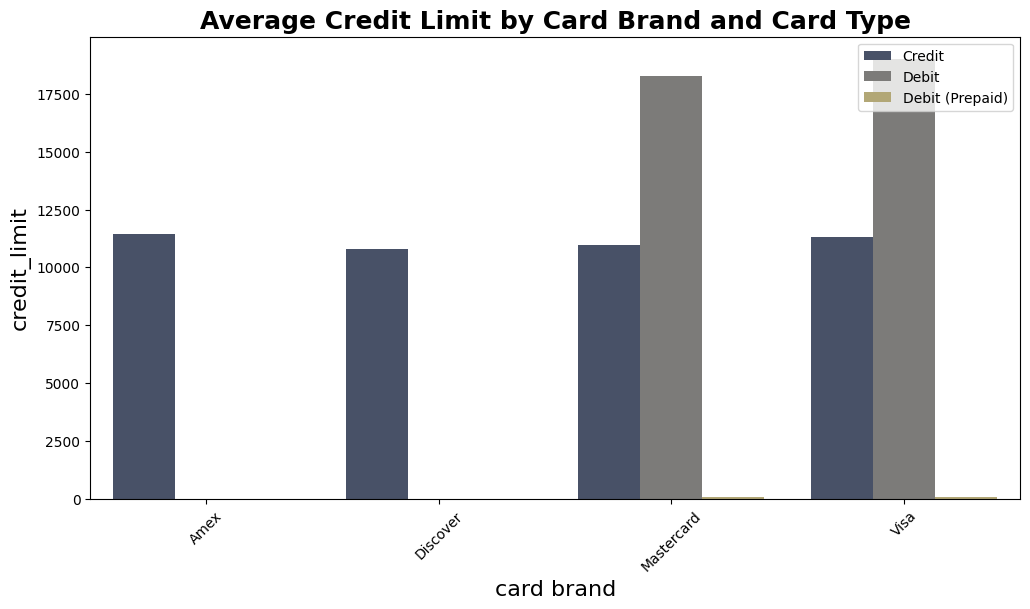

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x=brand_cards_limit['card_brand'],y=brand_cards_limit['AVG'],hue=brand_cards_limit['card_type'],palette='cividis')
plt.title('Average Credit Limit by Card Brand and Card Type', fontweight='bold',fontsize=18)
plt.xlabel('card brand',fontsize=16)
plt.ylabel('credit_limit',fontsize=16)
plt.xticks(rotation =45)
plt.legend()
plt.show()

In [16]:
df['cards_age_year'] = (df['expires']-df['acct_open_date']).dt.days/365
df[['cards_age_year']].head()

,cards_age_year
0,20.263014
1,6.673973
2,20.602740
3,21.597260
4,0.495890


In [46]:
avg_limit_by_age = df.groupby(['cards_age_year','card_type'])['credit_limit'].mean().reset_index()
avg_limit_by_age

,cards_age_year,card_type,credit_limit
0,0.000000,Credit,11976.190476
1,0.000000,Debit,19475.253731
2,0.000000,Debit (Prepaid),62.466667
3,0.076712,Debit,18552.000000
4,0.076712,Debit (Prepaid),61.000000
...,...,...,...
2100,29.432877,Credit,3400.000000
2101,30.189041,Credit,10600.000000
2102,30.435616,Credit,11600.000000
2103,32.358904,Debit,35203.000000


> ### Why Do We See These Outliers?
Seeing extreme points in the Credit Limit vs Card Age plot is not unusual. Here’s a quick breakdown of possible reasons and how to deal with them:

1.  **Premium or Corporate Cards**
Some customers or company accounts may have very high credit limits — these are real and not errors.
2. **Data Entry Errors**
Mistyped or wrongly recorded values can create extreme points that need to be validated.
3. **Natural Variations in Financial Data**
It’s normal to have rare cases with very high credit limits compared to the majority.
4. **Credit Limit Changes Over Time**
Older cards may have undergone multiple limit changes over the years, leading to unusual values.

 > ***Practical Tip: Use IQR or Flag Outliers Alternative: Highlight in Red Instead of Dropping***
 > ***Tip: Before removing any outliers, inspect their full details (brand, type, age) to differentiate between bad data and meaningful VIP cases.***

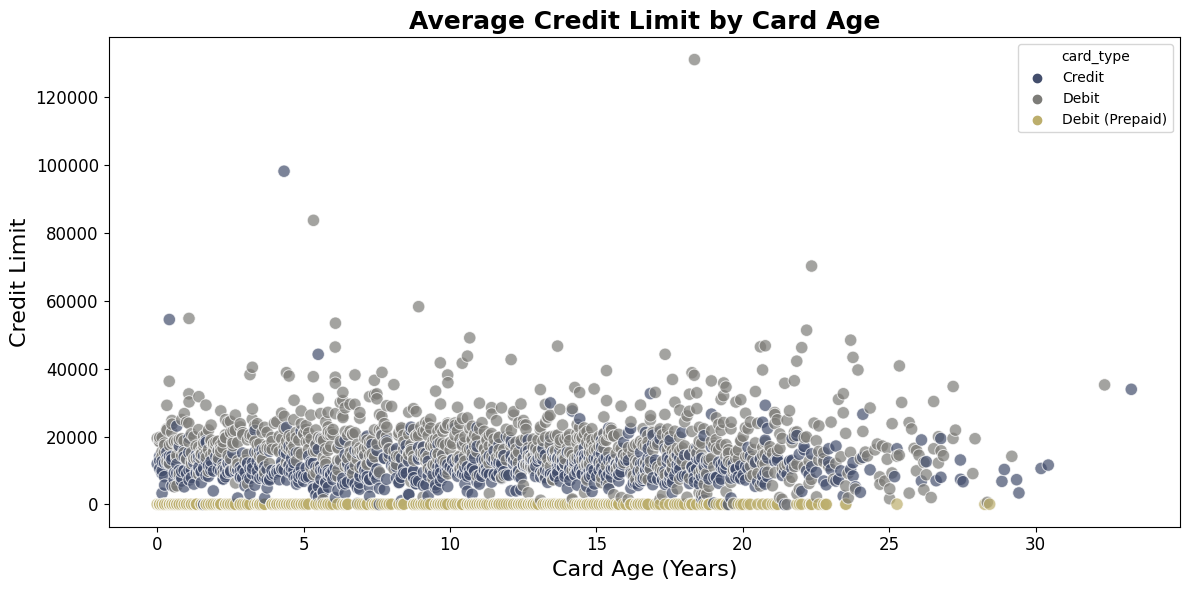

In [55]:
plt.figure(figsize=(12,6))


sns.scatterplot(
    x='cards_age_year', 
    y='credit_limit', 
    hue= 'card_type',
    data=avg_limit_by_age,
    marker='o',           
    s=80,  
    alpha=0.7,
    palette='cividis'
)


plt.title("Average Credit Limit by Card Age", fontsize=18, fontweight='bold')
plt.xlabel("Card Age (Years)", fontsize=16)
plt.ylabel("Credit Limit", fontsize=16)
#plt.grid(alpha=0.3, linestyle='--')  
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

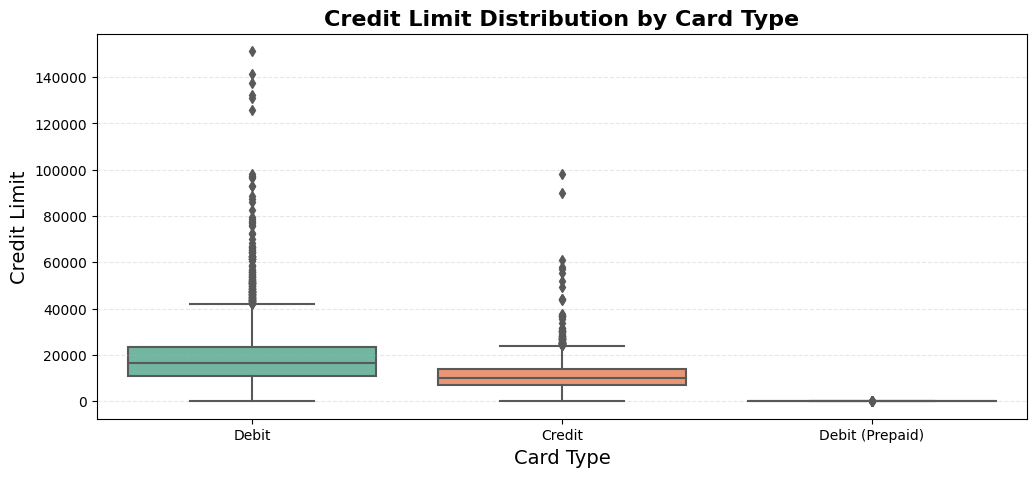

In [57]:
plt.figure(figsize=(12,5))
sns.boxplot(x='card_type', y='credit_limit', data=df,palette='Set2')
plt.title("Credit Limit Distribution by Card Type", fontsize=16, fontweight='bold')
plt.xlabel("Card Type", fontsize=14)
plt.ylabel("Credit Limit", fontsize=14)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.show()

In [63]:
df['has_chip'].value_counts()

has_chip
YES    5500
NO      646
Name: count, dtype: int64

In [68]:
yes = df[df['has_chip']=='YES'].count()[0] / len(df) * 100
print(f"The card has chip : {yes} %")

no = df[df['has_chip']=='NO'].count()[0] / len(df) * 100
print(f"The card has not chip : {no} %")

The card has chip : 89.4890986007159 %
The card has not chip : 10.510901399284087 %


In [89]:
custom_purple = ["#123458", "#D4C9BE"]
fig=px.pie(df,names='has_chip',color_discrete_sequence=custom_purple,title='Has chip')
iplot(fig)

 ## ***Count of Chips by Card Brand & Card Type***
> # Grouped by card_brand and card_type, counting rows of has_chip
This relation shows how many cards (rows) per brand & type have chip information recorded. Use it to quickly identify which brands or card types are more likely to include chip-enabled cards.
> # Key insights to look for
Does a particular brand have proportionally more chip-enabled cards?
Is the card type (Credit vs Debit) correlated with chip presence?
Compare counts with num_cards_issued to see if issuance volume explains chip counts.
If has_chip is sparse or biased, check for missing/incorrect values in that column.

In [4]:
count_chip_brand =  df.groupby(['card_brand','card_type'])['has_chip'].count().reset_index(name='count')
count_chip_brand

,card_brand,card_type,count
0,Amex,Credit,402
1,Discover,Credit,209
2,Mastercard,Credit,635
3,Mastercard,Debit,2191
4,Mastercard,Debit (Prepaid),383
5,Visa,Credit,811
6,Visa,Debit,1320
7,Visa,Debit (Prepaid),195


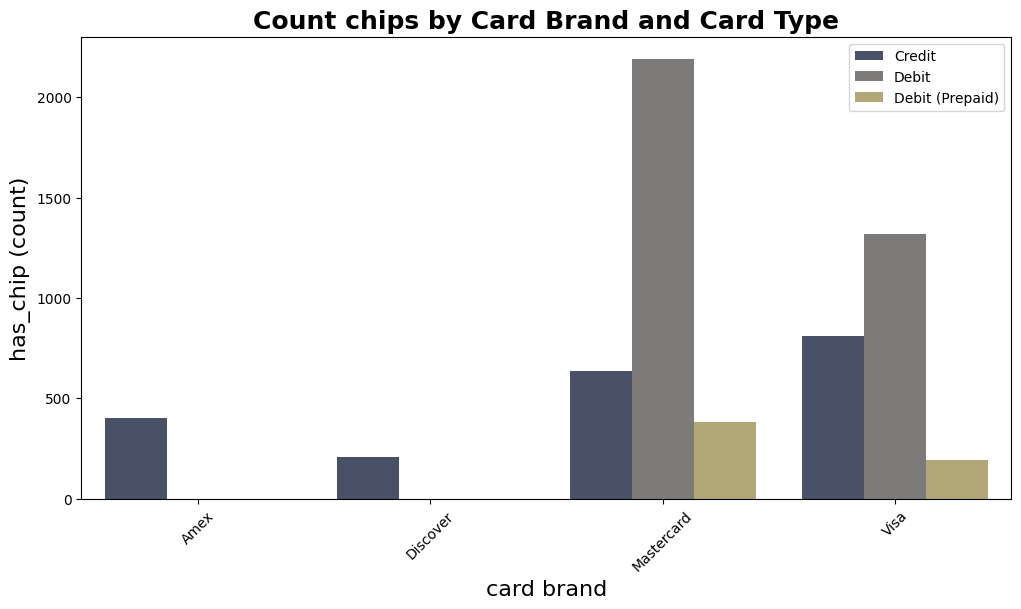

In [74]:
plt.figure(figsize=(12,6))
sns.barplot(x=count_chip_brand['card_brand'],y=count_chip_brand['count'],hue=count_chip_brand['card_type'],palette='cividis')
plt.title('Count chips by Card Brand and Card Type', fontweight='bold',fontsize=18)
plt.xlabel('card brand',fontsize=16)
plt.ylabel('has_chip (count)',fontsize=16)
plt.xticks(rotation =45)
plt.legend()
plt.show()


<html lang="en">
<head>
<meta charset="UTF-8">
<style>
  body{font-family:system-ui,-apple-system,"Segoe UI",Roboto,"Helvetica Neue",Arial;background:#f9fafb;margin:0;padding:0}
  .container{max-width:900px;margin:20px auto;background:white;border-radius:12px;padding:20px;box-shadow:0 4px 18px rgba(0,0,0,0.05);border:1px solid #e5e7eb}
  h2{margin-top:0;font-size:20px;color:#1e293b;font-weight:bold}
  p{color:#475569;font-size:14px;line-height:1.6}
  .chart{margin-top:16px;border:1px dashed #cbd5e1;border-radius:8px;background:#f8fafc;display:flex;align-items:center;justify-content:center;height:260px;color:#64748b;font-size:13px}
  ul{margin:12px 0;padding:0 16px;color:#334155;font-size:14px}
  li{margin-bottom:8px}
  .kpi-container{display:flex;gap:10px;margin-top:16px}
  .kpi{flex:1;background:#f1f5f9;padding:10px;border-radius:8px;text-align:center}
  .kpi-value{font-size:16px;font-weight:bold;color:#0f172a}
  .kpi-label{font-size:12px;color:#64748b}
</style>
</head>
<body>
  <div class="container">
    <h2>Average Credit Limit by Number of Cards Issued &amp; Chip Presence</h2>
    <p>
      This visualization shows how <b>average credit limit</b> changes with the <b>number of cards issued</b>,
      separated by whether a card <b>has a chip</b>.  
      It helps identify if chip-enabled cards tend to have higher or lower credit limits as issuance count changes.
    </p>

<div class="kpi-container">
      <div class="kpi">
        <div class="kpi-value">num_cards_issued</div>
        <div class="kpi-label">x-axis categories</div>
      </div>
      <div class="kpi">
        <div class="kpi-value">credit_limit</div>
        <div class="kpi-label">average value per group</div>
      </div>
      <div class="kpi">
        <div class="kpi-value">has_chip</div>
        <div class="kpi-label">hue (Yes/No)</div>
      </div>
    </div>

<ul>
      <li>Compare how credit limit changes as more cards are issued.</li>
      <li>Check if chip-enabled cards consistently show higher or lower credit limits.</li>
      <li>Look for trends: are corporate or premium cards with more issued cards linked to higher limits?</li>
      <li>Outliers in <code>credit_limit</code> may indicate special card programs or data entry errors.</li>
    </ul>
  </div>
</body>
</html>



In [75]:
num_cards_issue = df.groupby(['num_cards_issued','has_chip'])['credit_limit'].mean().reset_index()
num_cards_issue

,num_cards_issued,has_chip,credit_limit
0,1,NO,15246.515942
1,1,YES,15316.013362
2,2,NO,13251.744027
3,2,YES,13445.385592
4,3,NO,11358.250000
5,3,YES,9919.115385


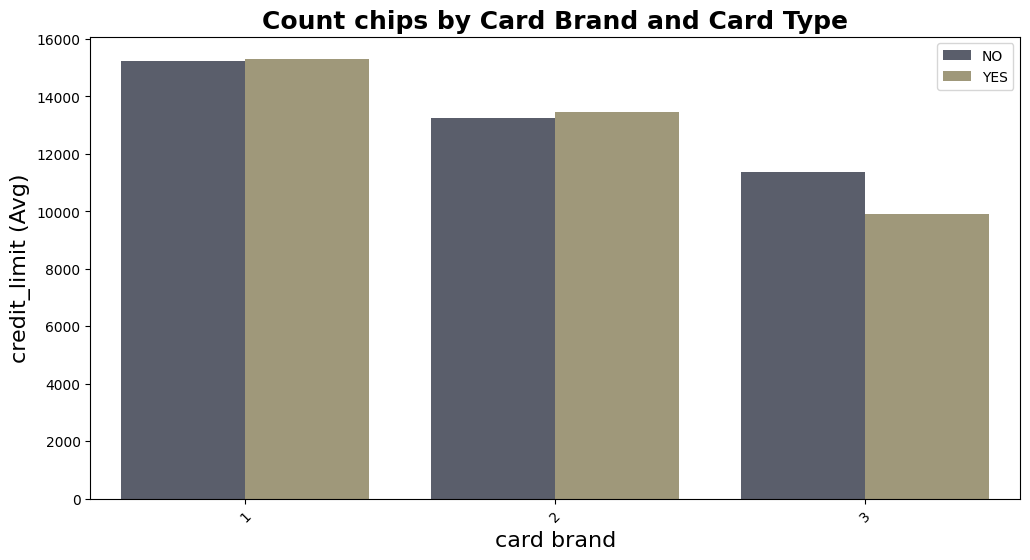

In [77]:
plt.figure(figsize=(12,6))
sns.barplot(x=num_cards_issue['num_cards_issued'],y=num_cards_issue['credit_limit'],hue=num_cards_issue['has_chip'],palette='cividis')
plt.title('Count chips by Card Brand and Card Type', fontweight='bold',fontsize=18)
plt.xlabel('card brand',fontsize=16)
plt.ylabel('credit_limit (Avg)',fontsize=16)
plt.xticks(rotation =45)
plt.legend()
plt.show()

In [81]:
df['year_pin_last_changed'].unique()

array([2008, 2014, 2004, 2012, 2009, 2011, 2015, 2019, 2007, 2010, 2020,
       2017, 2016, 2013, 2018, 2006, 2005, 2003, 2002])

In [6]:
df['years_since_opened_when_pin_changed'] = (
    df['year_pin_last_changed'] - df['acct_open_date'].dt.year
)


In [85]:
df['years_since_opened_when_pin_changed'].describe()

count    6146.000000
mean        2.775626
std         3.993803
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max        25.000000
Name: years_since_opened_when_pin_changed, dtype: float64

<div style="
    background-color:#f8f9fa;
    border: 2px solid #dee2e6;
    border-radius: 12px;
    padding: 15px 20px;
    margin: 15px 0;
    font-family: Arial, sans-serif;
    box-shadow: 0 4px 10px rgba(0,0,0,0.05);
    max-width: 700px;">
    
<h3 style="color:#343a40; margin-top:0; text-align:center;">
        Interpretation of PIN Change Distribution
    </h3>

<p style="font-size:16px; color:#212529;">
        The histogram shows a very high count in the first <b>0–1 year</b> bin. 
        This means that most customers changed their PIN shortly after opening the account.
    </p>

<ul style="font-size:15px; color:#495057; line-height:1.6;">
        <li><b>Security Best Practice:</b> Most banks require a PIN change during the first months for security reasons.</li>
        <li><b>Behavioral Pattern:</b> Many customers reset the default PIN early, leading to a high peak in year 0–1.</li>
        <li><b>Right-Skewed Distribution:</b> After the first year, the number of PIN changes decreases gradually — 
            forming a right-skewed distribution with a long tail.</li>
        <li><b>Possible Outliers:</b> Few customers may have very late PIN changes (10+ years) — these could be 
            real cases or data entry issues.</li>
    </ul>

<p style="font-size:15px; color:#212529;">
        This pattern is normal in time-to-event data: 
        most events happen early, then gradually decline over time.
    </p>
</div>


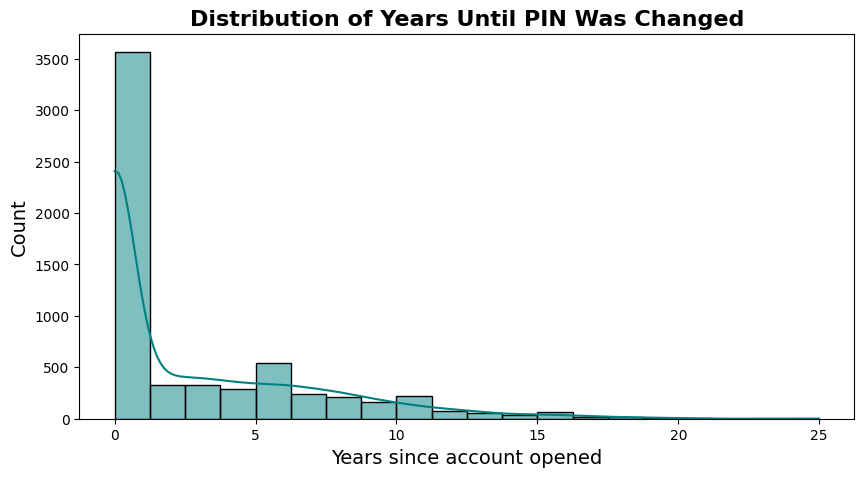

In [88]:
plt.figure(figsize=(10,5))
sns.histplot(df['years_since_opened_when_pin_changed'], bins=20, kde=True, color='teal')
plt.title("Distribution of Years Until PIN Was Changed", fontsize=16, fontweight='bold')
plt.xlabel("Years since account opened", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

<div style="
    background-color:#f8f9fa;
    border:1px solid #dee2e6;
    border-radius:10px;
    padding:15px 20px;
    margin:15px 0;
    font-family:Arial, sans-serif;
    max-width:750px;
    box-shadow:0px 4px 10px rgba(0,0,0,0.05);">

  <h3 style="color:#343a40; text-align:center; margin-top:0;">
    Average Credit Limit by Years Since PIN Change
  </h3>

  <p style="font-size:15px; color:#212529; line-height:1.6;">
    This line plot shows how the <b>average credit limit</b> changes depending on 
    the number of years since the account was opened and the PIN was changed.
  </p>

  <ul style="font-size:15px; color:#495057; line-height:1.6;">
    <li><b>X-Axis:</b> Years since account was opened when the PIN was last changed.</li>
    <li><b>Y-Axis:</b> Average credit limit for cards.</li>
    <li><b>Color / Hue:</b> Represents different <b>card types</b> (e.g. Credit, Debit, Prepaid).</li>
    <li>The chart helps spot trends — for example, whether older accounts tend to have higher credit limits.</li>
  </ul>

  <p style="font-size:14px; color:#6c757d; font-style:italic;">
    Tip: Look for sudden peaks — they may indicate that specific card types get 
    higher credit limits after a certain number of years.
  </p>
</div>


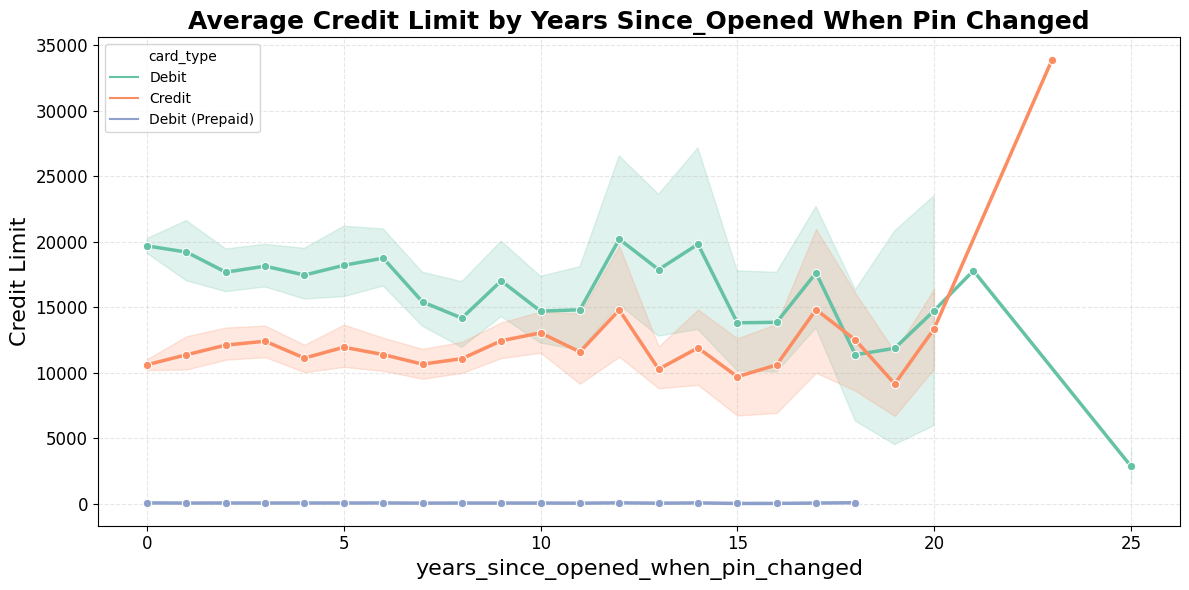

In [13]:
plt.figure(figsize=(12,6)) 
sns.lineplot( 
    x='years_since_opened_when_pin_changed', 
    y='credit_limit', 
    hue= 'card_type' ,
    data=df,
    marker='o',
    linewidth=2.5, 
    palette='Set2' 
) 
plt.title("Average Credit Limit by Years Since_Opened When Pin Changed", fontsize=18, fontweight='bold') 
plt.xlabel("years_since_opened_when_pin_changed", fontsize=16) 
plt.ylabel("Credit Limit", fontsize=16) 
plt.grid(alpha=0.3, linestyle='--') 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.tight_layout() 
plt.show()

<Figure size 1200x600 with 0 Axes>

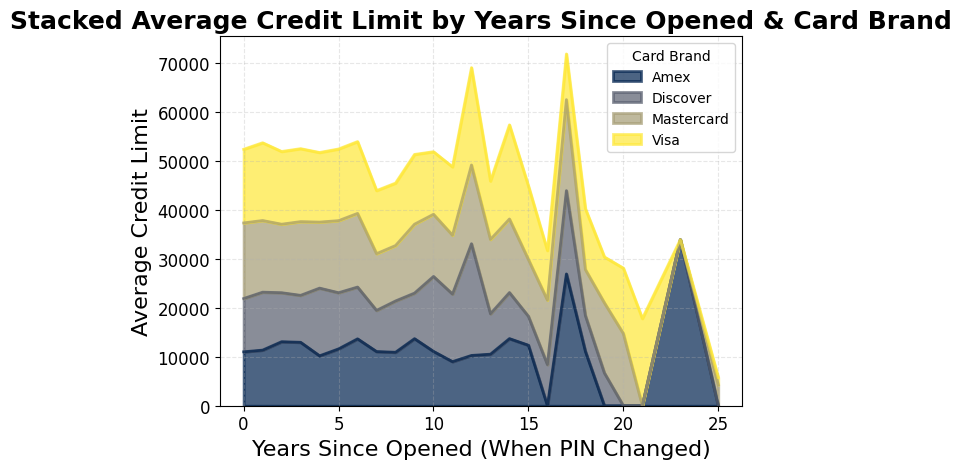

In [22]:
pivot_df = df.pivot_table(
    index='years_since_opened_when_pin_changed',
    columns='card_brand',
    values='credit_limit',
    aggfunc='mean'
).fillna(0)


plt.figure(figsize=(12,6))
pivot_df.plot(
    kind='area',
    stacked=True,
    colormap='cividis',
    alpha=0.7,
    linewidth=2
)

plt.title("Stacked Average Credit Limit by Years Since Opened & Card Brand", fontsize=18, fontweight='bold')
plt.xlabel("Years Since Opened (When PIN Changed)", fontsize=16)
plt.ylabel("Average Credit Limit", fontsize=16)
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Card Brand")
plt.tight_layout()
plt.show()

In [24]:
df.drop(['expires','acct_open_date','year_pin_last_changed'],axis=1,inplace=True)

In [25]:
df.to_csv('Cards_cleaning.csv',index=False)